In [9]:
include("../src/AdsorptionModel.jl")

run_simulation (generic function with 1 method)

In [11]:
adsorption = OperatingParameters(;
                    step_name = "Adsorption",
                    u_feed = 7.06*1e-2,
                    T_feed = 288.15,
                    T_amb = 288.15,
                    P_high = 1.01325e5,
                    P_low = 0.12e5,
                    y_CO2_feed = 0.0004,
                    y_H2O_feed = 0.009345593559109749,
                    duration = 8000)

heating = OperatingParameters(;
                step_name = "Heating",
                u_feed = 0.0,
                T_feed = 288.15,
                T_amb = 99.35+273.15,
                P_high = 1.01325e5,
                P_low = 0.12e5,
                y_CO2_feed = 0.0,
                y_H2O_feed = 1.0,
                duration = 1147
                )

@time sol, index_data = run_simulation(;N=10, cycle_steps=[adsorption], num_cycles=1)

Running step Adsorption
end_times = [8000.0]
  0.181942 seconds (4.76 M allocations: 343.779 MiB, 27.60% gc time)


(Main.sol, AdsorptionData(1, 2, 3, 4, 5, 6, 7, 8, 1, 2, OperatingParameters(0.0706, 288.15, 288.15, var"#59#64"{Float64}(101325.0), 0.0004, 0.009345593559109749, 8000.0, "Adsorption", 0.9902544064408902, 42.29489667460054, 41.88270780198534, 0.016917958669840215, 0.3952709139453591, 5.4989999999999994e-5, 1235.9134963579381, 0.06796288316472301)))

In [12]:
using XLSX
using DataFrames
df = XLSX.readtable("../excels/x_sol_ads_cycle0.xlsx", 1) |> DataFrame
nothing

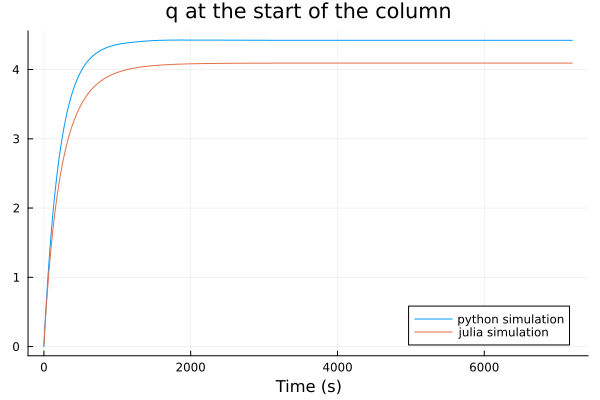

In [13]:
p = plot(parse.(Float64, names(df)), collect(df[51, :]), label="python simulation")
ts = 1:7200
plot!(ts, [sol(t)[index_data.iq_H2O, 1] for t in ts], label="julia simulation")
xlabel!("Time (s)")
title!("q at the start of the column")
savefig("CO2_concentration.png")
p

In [44]:
df = XLSX.readtable("../Lewatit_dry_BTC.xlsx", 1) |> DataFrame

Row,Time h),CO2,N2,CO2_ppm
,Any,Any,Any,Any
1,0.000166667,0,0,0
2,0.01145,0,0,0
3,0.01626,0,0.07097,0
4,0.02316,0,0.33616,0
5,0.0289,0,0.57275,0
6,0.03479,0,0.72758,0
7,0.04039,0,0.82117,0
8,0.04599,0,0.87495,0
9,0.05257,0,0.90555,0


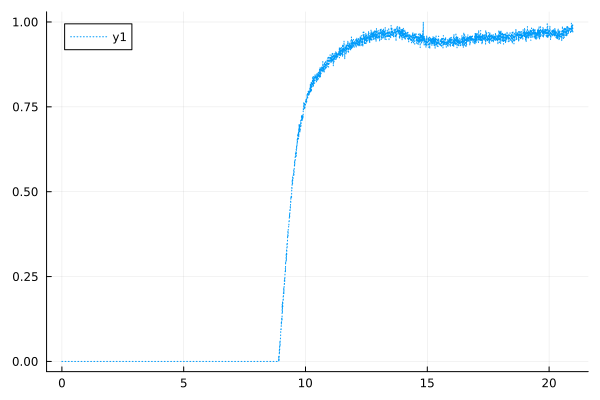

In [7]:
plot(df[:, "Time h)"], df[:, "CO2"], ls=:dot)